In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\linearRegressionDataSets\excs\Ecommerce Customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


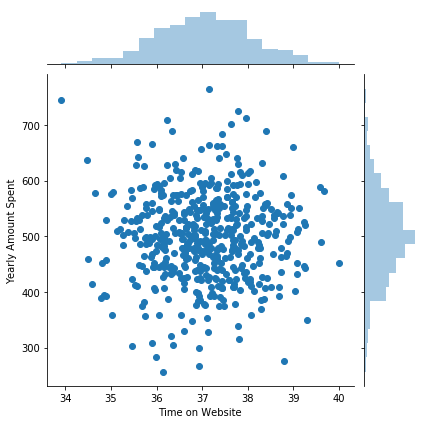

In [6]:
sns.jointplot(data=data,x='Time on Website',y='Yearly Amount Spent')

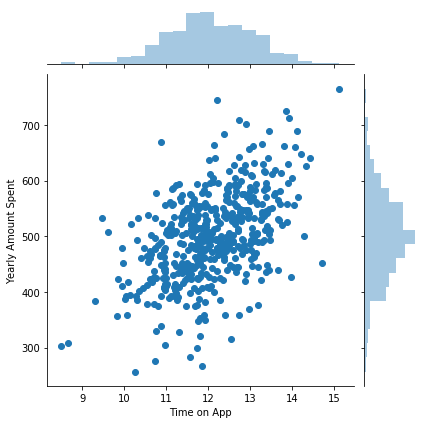

In [7]:
sns.jointplot(data=data,x='Time on App',y='Yearly Amount Spent')

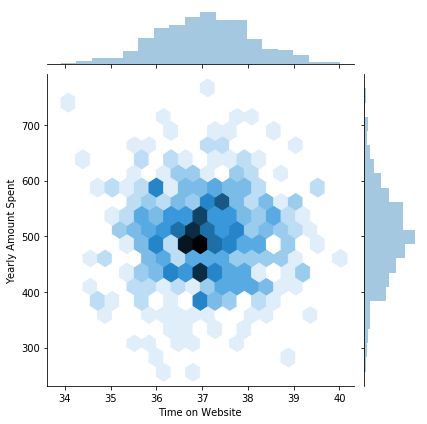

In [8]:
sns.jointplot(data=data,x='Time on Website',y='Yearly Amount Spent',kind='hex')

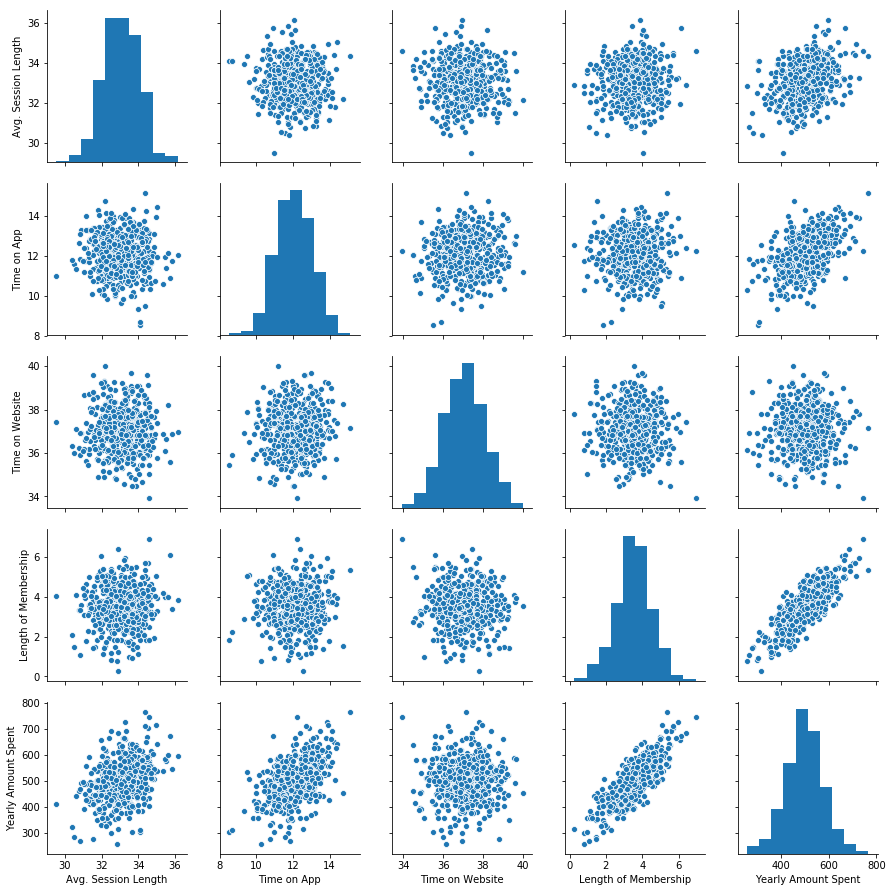

In [9]:
sns.pairplot(data)

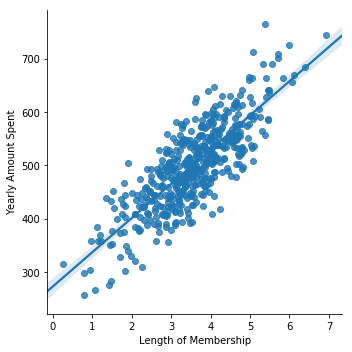

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [11]:
data.columns


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X=data.loc[:,['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=data.loc[:,'Yearly Amount Spent']

MAE: 7.742671285838735
MSE: 93.83297800820081
RMSE: 9.686742383701592
Explained_variance_score:  0.9855104108086417


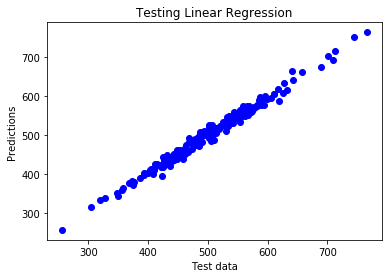

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

lm=LinearRegression()

lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

plt.scatter(y_test,predictions,color='blue')
plt.xlabel('Test data')
plt.ylabel('Predictions')
plt.title('Testing Linear Regression')

MAE=metrics.mean_absolute_error(y_test,predictions)
MSE=metrics.mean_squared_error(y_test,predictions)
RMSE=math.sqrt(MSE)
Explained_variance_score=metrics.explained_variance_score(y_test,predictions)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print('Explained_variance_score: ',Explained_variance_score)

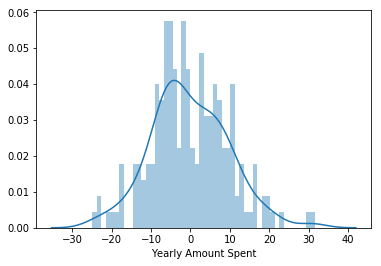

In [14]:
sns.distplot((y_test-predictions),bins=50)

In [15]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
cdf.columns.name='Features'
cdf.head()

Features,Coef
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


In [16]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
350,33.304337,12.692661,37.333591,3.827376
32,32.175501,13.387492,35.694175,4.343063
205,34.967610,13.919494,37.952013,5.066697
81,34.594021,10.947259,35.883994,3.159754
414,32.381035,12.433129,37.626907,4.334001


In [18]:
lm.score(X_train,y_train)

0.9832599238000473